# Cross-Cohort Music Recommendation - EDA

You are a data scientist for a remote education company. Your manager is interested in exploring non-traditional ways of boosting remote student engagement.

One avenue that they would like to particularly explore is the effect of "waiting-room" music on a students attentiveness for a 4-hour class. They've provided you a dataset of 61 songs and their "music2vec" embeddings.

You will complete the idiomatic steps of the machine-learning pipeline:
* EDA: what sorts of relationships/clusterings do you notice within your dataset?
* Machine Learning: which machine learning pipeline should you apply to your dataset. How will you measure the effectiveness of this model?

Once you generate your machine learning model, you will then serialize it and load it into a dashboard which provides song recommendations based on a users listening history.

To run this dashboard execute the following command in your terminal (after you've completed clustering)

```bash
streamlit run recommender.py
```

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [29]:
# TODO: load in dataset
songs = pd.read_csv('../data/music_embeds.csv')

# TODO: view first few columns
songs.head()

,filename,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,song,genre
0,A Fan's Mail,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,...,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774,A Fan's Mail,funk
1,Abracadabra,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,...,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757,Abracadabra,pop
2,Aguas De Marco,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,...,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079,Aguas De Marco,bossa nova
3,Another Time,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,...,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729,Another Time,hip hop
4,Belong to the World,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,...,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235,Belong to the World,hip hop


In [30]:
# TODO: select your predictive columns
X = songs.drop(columns=['filename','song', 'genre'])

# TODO: select your song-name column for later manipulation
song_names = songs['song']

# TODO: select your genre column for later manipulation
genres = songs['genre']

In [31]:
# TODO: Using PCA, decompose your embeddings into 4 components for easy visualization
pca = PCA(n_components=4)

# TODO: fit & transform your predictors
X_pca = pca.fit_transform(X)

# TODO: view your PCA components
print("PCA transformed data:", X_pca.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

PCA transformed data: (61, 4)
Explained Variance Ratio: [0.27220876 0.17232414 0.09344634 0.04277885]


In [32]:
# TODO: transform your X_pca variable into a dataframe
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# TODO: merge your pca components, song name, and genre together into one dataframe (be sure to merge on the index)
merged_df = pd.concat([pca_df, song_names, genres], axis=1)

# TODO: view the first 5 rows of your merged df
merged_df.head()

,PC1,PC2,PC3,PC4,song,genre
0,0.084061,-0.077482,-0.063781,-0.062144,A Fan's Mail,funk
1,0.332044,-0.154053,-0.060291,0.151898,Abracadabra,pop
2,-0.011686,0.194544,-0.046370,0.046979,Aguas De Marco,bossa nova
3,0.009237,-0.109553,-0.111190,-0.089907,Another Time,hip hop
4,0.308582,-0.040624,-0.119071,0.149660,Belong to the World,hip hop


In [33]:
#check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PC1      0
PC2      0
PC3      0
PC4      0
song     0
genre    0
dtype: int64


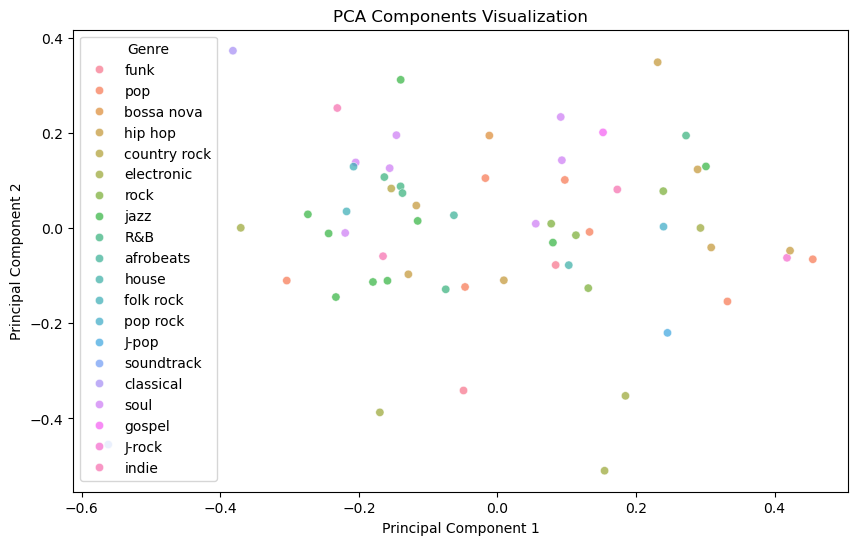

In [34]:
# TODO: BEGIN YOUR EDA! Create as many code-blocks as you need to answer your questions below
# Example: Visualizing the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='genre', alpha=0.7)
plt.title('PCA Components Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre')
plt.show()  

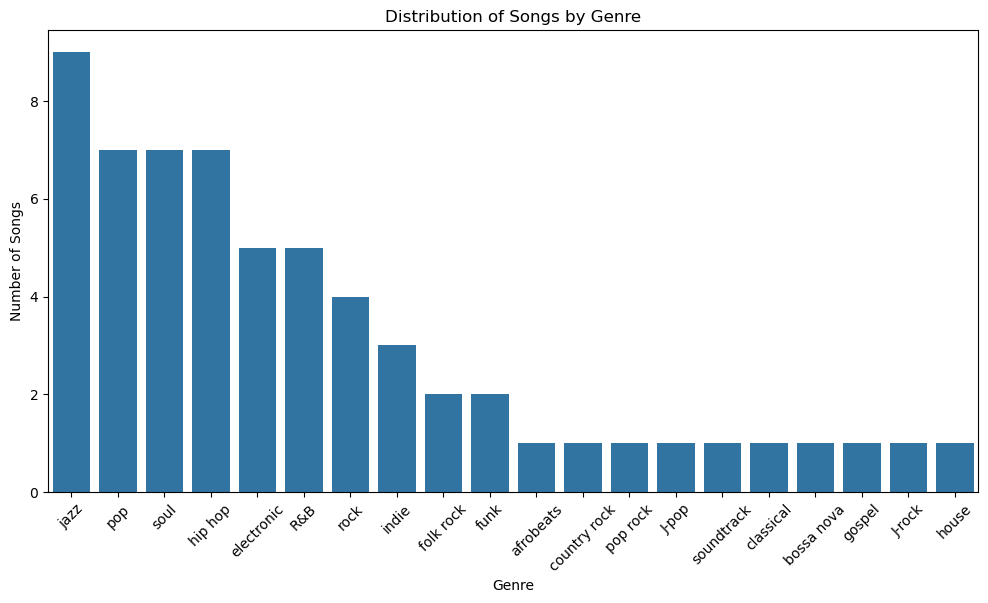

In [35]:
#create your own visualizations for song distribution, genre distribution in PCA space, or any other interesting insights you can find in the data.
# You can add more visualizations or analyses as needed
# Example: Distribution of songs by genre
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='genre', order=merged_df['genre'].value_counts().index)
plt.title('Distribution of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()      

## Questions

Using the visualizations you've generated, answer the 4 exploratory questions below. If you are not able to answer this question, describe to the best of your ability, what sorts of roadblocks, errors, or questions  you encountered when attempting to answer the question. This will be sufficient for a full grade.

An example of what this looks like is included below.

### Example Question

Which individual tracks are outliers in PC space?

I’m not entirely sure of the exact formula or functions to use here
* Whats the right threshold for calling something an "outlier"?
* How do I handle missing or extreme PCA values before finding outliers?

### Q1 

How are songs distributed (if a distributione exists) in the principal‐component dimensions by genre?

[Answer Here]

/var/folders/k0/k5r4gt214pvgqxc8cml0zfv40000gn/T/ipykernel_31670/1334289696.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre')


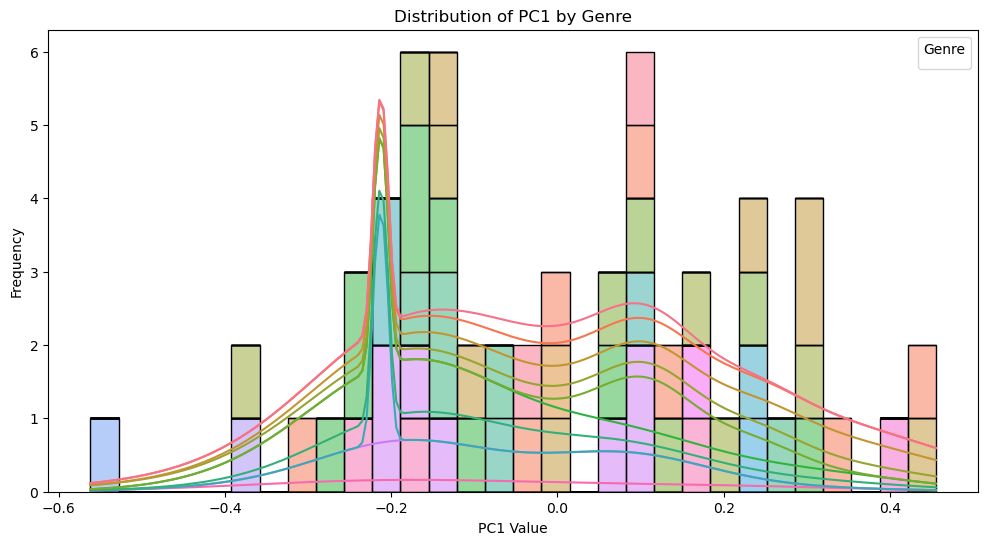

In [36]:
#histogram of PCA components by genre
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='PC1', hue='genre', multiple='stack', bins=30, kde=True)
plt.title('Distribution of PC1 by Genre')
plt.xlabel('PC1 Value')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.show()

/var/folders/k0/k5r4gt214pvgqxc8cml0zfv40000gn/T/ipykernel_31670/369153529.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre')


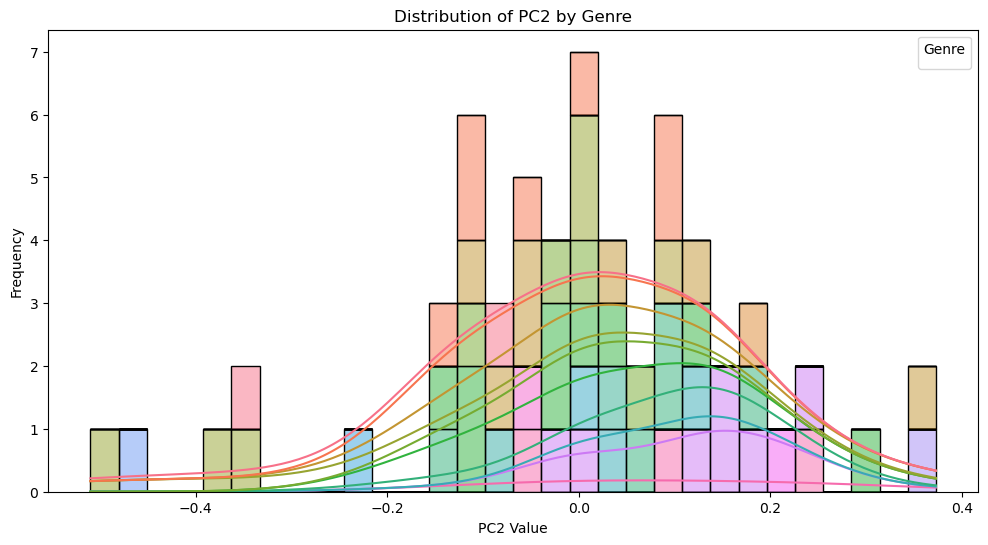

In [37]:
#histogram of PCA components by genre
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='PC2', hue='genre', multiple='stack', bins=30, kde=True)
plt.title('Distribution of PC2 by Genre')
plt.xlabel('PC2 Value')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.show()  

/var/folders/k0/k5r4gt214pvgqxc8cml0zfv40000gn/T/ipykernel_31670/1057874863.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre')


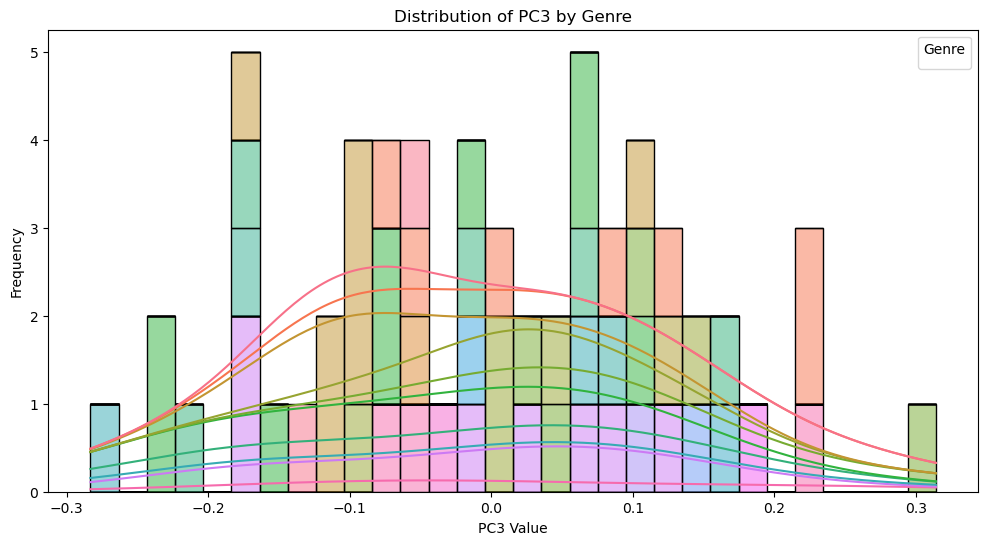

In [38]:
#histogram of PCA components by genre
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='PC3', hue='genre', multiple='stack', bins=30, kde=True)
plt.title('Distribution of PC3 by Genre')
plt.xlabel('PC3 Value')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.show()  

/var/folders/k0/k5r4gt214pvgqxc8cml0zfv40000gn/T/ipykernel_31670/2074529576.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre')


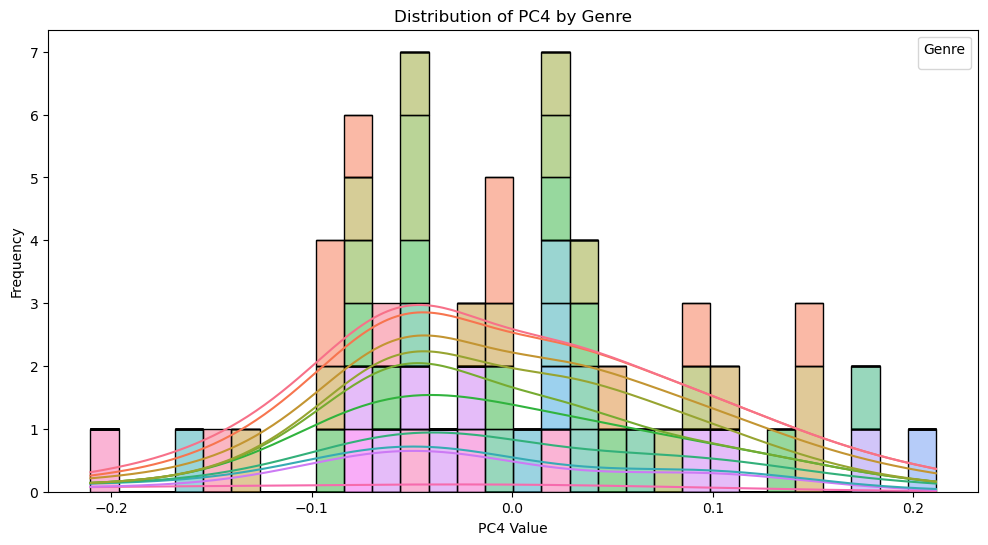

In [39]:
#histogram of PCA components by genre
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='PC4', hue='genre', multiple='stack', bins=30, kde=True)
plt.title('Distribution of PC4 by Genre')
plt.xlabel('PC4 Value')
plt.ylabel('Frequency')
plt.legend(title='Genre')
plt.show()

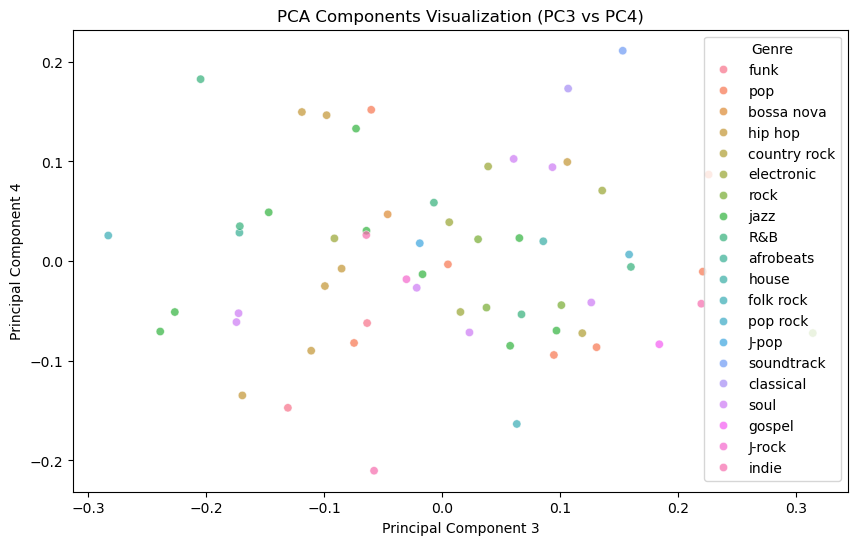

In [40]:
#scatter plot of PCA components colored by genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PC3', y='PC4', hue='genre', alpha=0.7)
plt.title('PCA Components Visualization (PC3 vs PC4)')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.legend(title='Genre')
plt.show()  

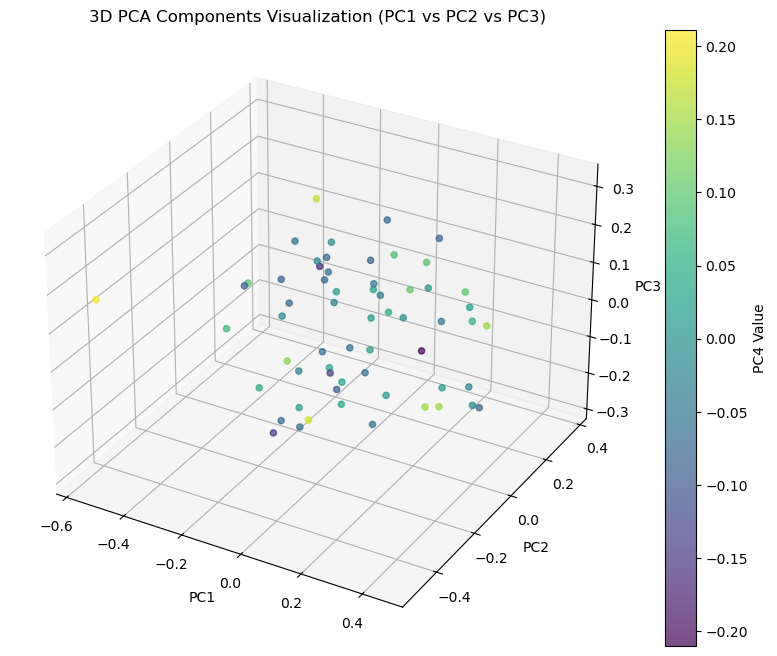

In [41]:
#plot PC1 vs PC2 vs PC3 vs PC4
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(merged_df['PC1'], merged_df['PC2'], merged_df['PC3'], c=merged_df['PC4'], cmap='viridis', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(ax.collections[0], label='PC4 Value')
plt.title('3D PCA Components Visualization (PC1 vs PC2 vs PC3)')
plt.show()              

### Q2 

Which genre shows the highest (and lowest) average value on PC1?

Soundtrack has the lowest average PC1 Value and  has the highest. 

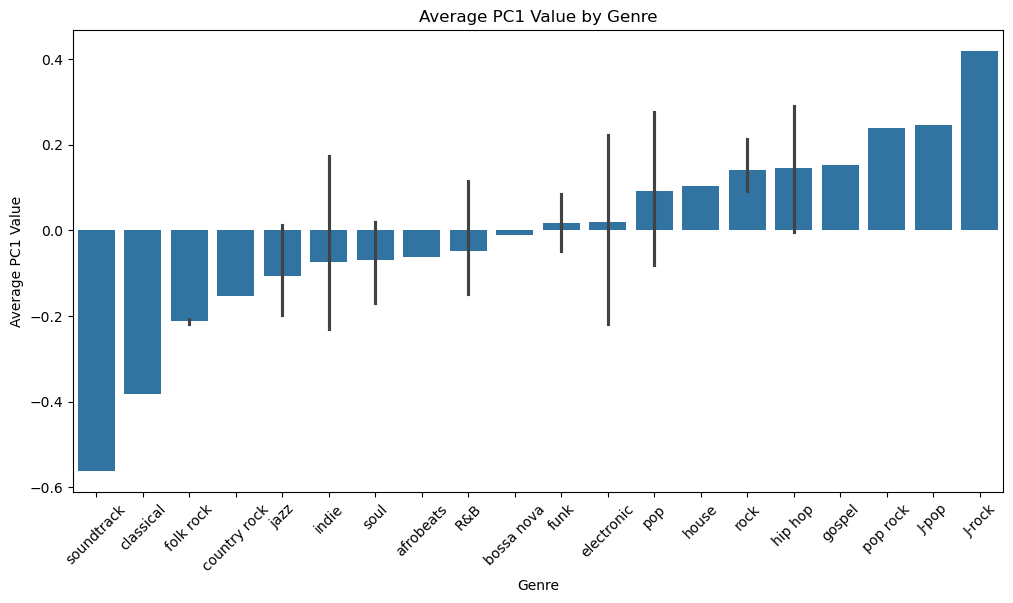

In [42]:
#visualize genre average value on PC1
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='genre', y='PC1', order=merged_df.groupby('genre')['PC1'].mean().sort_values().index)
plt.title('Average PC1 Value by Genre')
plt.xlabel('Genre')
plt.ylabel('Average PC1 Value')
plt.xticks(rotation=45)
plt.show()

### Q3 

Do any genres exhibit particularly wide dispersion along PC3?

Folk rock, jazz, R&B, Soul, and Rock have the widest range of values for PC3

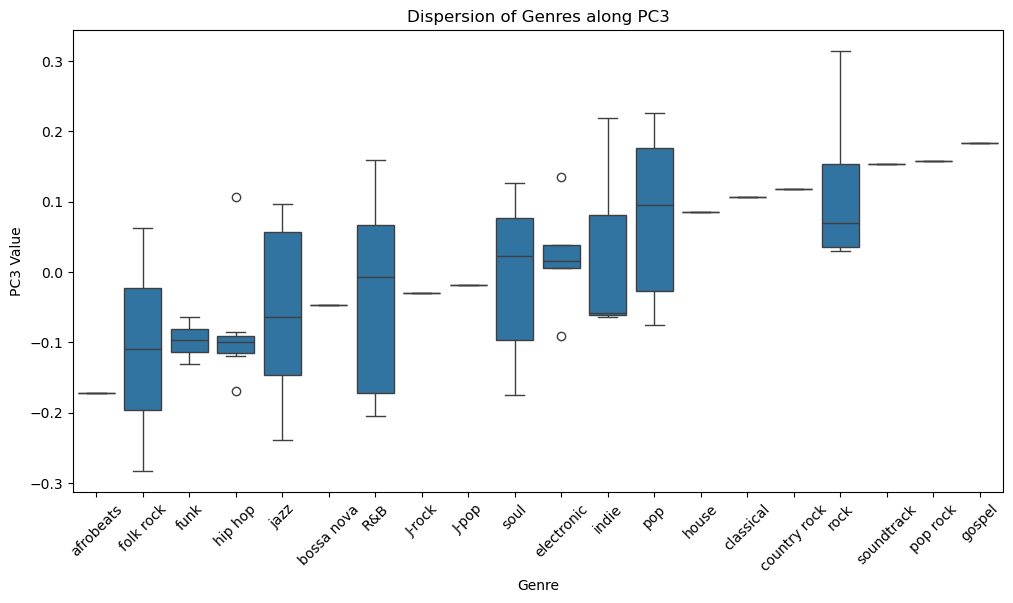

In [43]:
#visualize dispersion of genres along PC3
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='genre', y='PC3', order=merged_df.groupby('genre')['PC3'].mean().sort_values().index)
plt.title('Dispersion of Genres along PC3')
plt.xlabel('Genre')
plt.ylabel('PC3 Value')
plt.xticks(rotation=45)
plt.show()

### Q4

Are any pairs of PCA components strongly correlated?

There is no correlation between PCA components

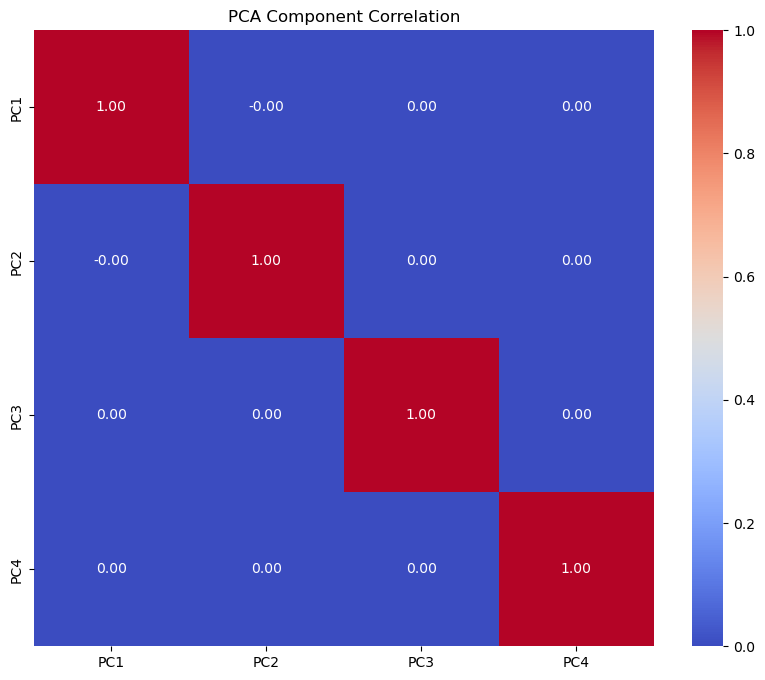

In [44]:
#visualize PCA component correlation
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[['PC1', 'PC2', 'PC3', 'PC4']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Component Correlation')
plt.show()

In [45]:
# filename column to merged df
merged_df['filename'] = songs['filename']
print("Filename column added to merged DataFrame")
merged_df.head()

Filename column added to merged DataFrame


,PC1,PC2,PC3,PC4,song,genre,filename
0,0.084061,-0.077482,-0.063781,-0.062144,A Fan's Mail,funk,A Fan's Mail
1,0.332044,-0.154053,-0.060291,0.151898,Abracadabra,pop,Abracadabra
2,-0.011686,0.194544,-0.046370,0.046979,Aguas De Marco,bossa nova,Aguas De Marco
3,0.009237,-0.109553,-0.111190,-0.089907,Another Time,hip hop,Another Time
4,0.308582,-0.040624,-0.119071,0.149660,Belong to the World,hip hop,Belong to the World


In [46]:
#save the merged dataframe for future use
merged_df.to_csv('../data/merged_music_embeds.csv', index=False)
print("Merged DataFrame saved to '../data/merged_music_embeds.csv'")

Merged DataFrame saved to '../data/merged_music_embeds.csv'
